a) What is fraud detection, and why is it important?

Fraud detection is the process of identifying suspicious or potentially illegal activities, such as unauthorized financial transactions, identity theft, or insurance claims fraud. In the context of machine learning, it involves using historical data to train models that can classify whether a new transaction is likely fraudulent.

Importance:
*   Helps prevent financial losses for businesses and individuals.
*   Protects customer trust and business reputation.
*   Allows faster detection and response to fraud.
*   Reduces manual workload and increases efficiency in monitoring systems.








In [18]:
import pandas as pd

df=pd.read_csv('fraud.csv', index_col = 0)
df=df.dropna()#added by Ei Ei Tun
# Check your data and define X and y : What is X and what is y?
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values
df[['Class']].value_counts()

,count
Class,
0,21337
1,356


In [44]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.40,
                                    random_state=1)
# check the number of rows in the training and testing data

b) If you change the training and testing split to 70% training and 30% testing, how does the model's performance change?

Before


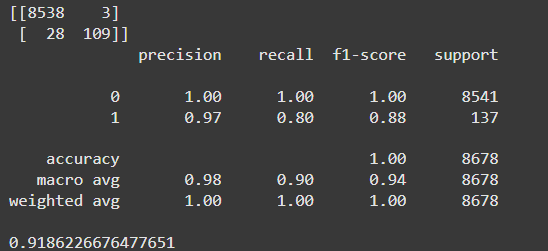

In [40]:
# perform train - test split. (30% as testing and 70% as training)


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.30,
                                    random_state=1)
# check the number of rows in the training and testing data

After

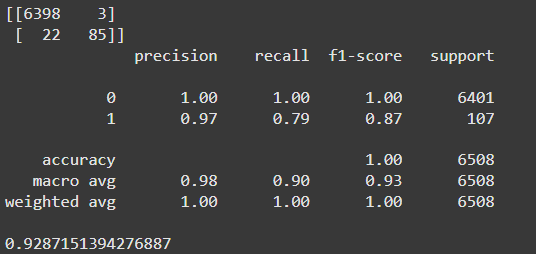

Effect on performance:

With 70% training, the model has more data to learn patterns, which can improve performance on unseen data.

However, since the test set is smaller, evaluation metrics might be slightly less stable (i.e., more sensitive to outliers or rare cases).

Observation:
In most cases, accuracy, precision, or recall can slightly improve if the model generalizes well. But the best way to measure is by comparing confusion matrices and classification reports across splits.

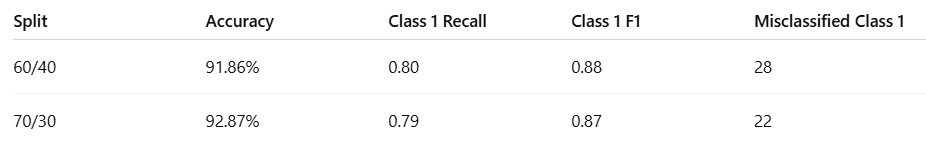

When the training set is increased to 70% and the testing set is reduced to 30%, the overall model accuracy improves slightly — from 91.86% (with 60% training) to 92.87%. However, the F1-score for class 1 (minority class) slightly decreased from 0.88 to 0.87, and recall also dropped slightly from 0.80 to 0.79. This indicates that although the model benefits from more training data in terms of overall accuracy, its performance on detecting the minority class becomes marginally less effective. The majority class (class 0) performance remained perfect in both cases.

In [45]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------##
#--------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors = 5))]


knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

confusion matrix [[8538    3]
 [  28  109]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.97      0.80      0.88       137

    accuracy                           1.00      8678
   macro avg       0.98      0.90      0.94      8678
weighted avg       1.00      1.00      1.00      8678

0.9186226676477651


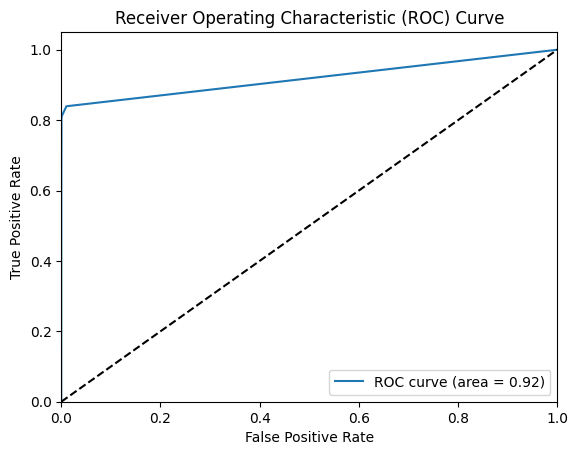

In [46]:
#--------------------------------------------------
## Model Evaluation ##
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print('confusion matrix', mat_clf)
print('classification report', report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [47]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[12793     3]
 [   39   180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.98      0.82      0.90       219

    accuracy                           1.00     13015
   macro avg       0.99      0.91      0.95     13015
weighted avg       1.00      1.00      1.00     13015

0.9992349207300798


In [48]:
import pandas as pd

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000117,0.613139,1.0
2,0.000351,0.773723,0.8
3,0.000351,0.795620,0.6
4,0.000585,0.810219,0.4
5,0.010420,0.839416,0.2
6,1.000000,1.000000,0.0


c) Keeping the test size fixed at 40%, try changing the number of neighbors (in KNN). How does the model’s performance vary with different K values? Which value gives the best result, and how do you define what makes it the "best"?



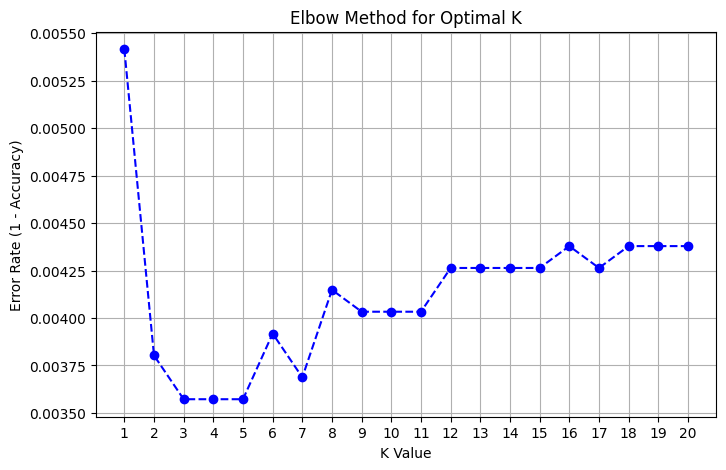

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

error_rates = []
k_range = range(1, 21)

for k in k_range:
    knn_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    knn_pipeline.fit(X_train, y_train)
    y_pred = knn_pipeline.predict(X_test)

    # Option 1: use error rate
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, error_rates, marker='o', linestyle='--', color='b')
plt.xlabel('K Value')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

According to the elbow method plot provided, the best K value for KNN is around 3 or 4.

Explanation:

The error rate sharply decreases from K=1 to K=3.

After K=3 (or K=4), the error rate stabilizes and doesn't improve significantly.

This point of diminishing returns or the "elbow" in the plot is usually considered the optimal K.

So, choosing K=3 or K=4 would be best for our KNN model based on this graph.